# Neural Net from Scratch


In [ ]:
from google.colab import drive
drive.mount("/content/drive")
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/")

Mounted at /content/drive


In [ ]:
# setup do ambiente python
from rpy2 import ipython
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
# setup do ambiente R
%%R
library(ggplot2)
library(dplyr)
library(tidyr)

In [ ]:
# Criação dos conjuntos de dados
import numpy as np
from sklearn.datasets import make_blobs
X, Y = make_blobs(n_samples=1000, centers=[[0.5,0.5],[2.5,2.5]], n_features=2,
                  random_state = 1)

import pandas as pd
dados = pd.DataFrame(data = np.column_stack((X,Y)),
                     columns = ["x1","x2","y"])
dados.to_csv("dados.csv", sep=";", decimal=',', index=False)
dados.head(3)

,x1,x2,y
0,0.224154,1.728956,0.0
1,0.664665,1.278174,0.0
2,3.014412,2.482749,1.0


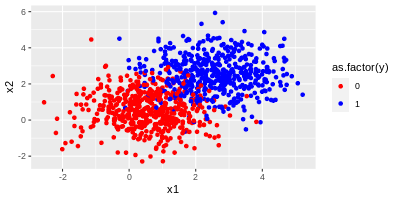

In [ ]:
# Visualização do conjunto de dados
%%R -w 400 -h 200
read.csv2("dados.csv") -> dados
ggplot(dados, aes(x=x1, y=x2)) + 
  geom_point(aes(color=as.factor(y))) + 
  scale_color_manual(values=c("red","blue"))

In [ ]:
# Funções de ativação
relu = lambda z: max(0,z)
sig = lambda z: 1/(1+np.exp(-z))

z = np.linspace(-3,3,100)
a1 = list(map(relu,z))
a2 = list(map(sig,z))
df = pd.DataFrame({"z":z, "relu":a1, "sig":a2})
df.to_csv("dados.csv")
df.head(3)

,z,relu,sig
0,-3.000000,0.0,0.047426
1,-2.939394,0.0,0.050240
2,-2.878788,0.0,0.053212


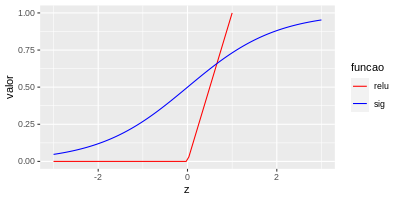

In [ ]:
# Visualização das funções de ativação
%%R -w 400 -h 200
dados <- read.csv("dados.csv")
gather(dados, key=funcao, value=valor, c("relu","sig")) -> dados2
ggplot(dados2, aes(x=z, y=valor)) +
  geom_line(aes(color=funcao)) +
  scale_color_manual(values=c("red","blue")) +
  ylim(0,1)

In [ ]:
# 1o Exercício: implementar para um neuron, um passo de ajuste dos pesos
#  w1 e w2. A função de erro é a BCE. Os dados de entrada são x1 e x2, 
#  o dado de saida é y. Os três valores encontram-se no data frame dados
#  Calcule o valor da função de erro BCE, antes e depois do ajuste dos pesos
#  Utilizar como hiperparâmetro alpha o valor 0.01. Alpha é a taxa de 
#  aprendizado

# Valores de entrada e saida
x1, x2, y = dados.loc[0,:]

# Inicialização dos pesos
np.random.seed(1)
w1, w2, wb = np.random.uniform(), np.random.uniform(), np.random.uniform()
print("w1=",np.round(w1,3),"w2=",np.round(w2,3), "wb=",np.round(wb,3))

# Feedforward
z = w1*x1 + w2*x2 + wb*1
A = sig(z)

# Erro
BCE = -(y*np.log(A) + (1-y)*np.log(1-A))
print("BCE=",np.round(BCE,3))

# Backpropagation
dBCE_dA = -y/A + (1-y)/(1-A)
dA_dz = np.exp(-z)/(1+np.exp(-z))**2 
dz_dw1 = x1
dz_dw2 = x2
dz_dwb = 1

# Gradient descent
dBCE_dw1 = dBCE_dA * dA_dz * dz_dw1
dBCE_dw2 = dBCE_dA * dA_dz * dz_dw2
dBCE_dwb = dBCE_dA * dA_dz * dz_dwb

alpha = 0.01 # Taxa de aprendizado

w1 = w1 - alpha * dBCE_dw1
w2 = w2 - alpha * dBCE_dw2
wb = wb - alpha * dBCE_dwb

print()
print("w1=",np.round(w1,3), "w2=",np.round(w2,3), "wb=",np.round(wb,3))

# Feedforward
z = w1*x1 + w2*x2
A = sig(z)

# Erro
BCE = -(y*np.log(A) + (1-y)*np.log(1-A))
print("BCE=",np.round(BCE,3))

w1= 0.417 w2= 0.72 wb= 0.0
BCE= 1.452

w1= 0.423 w2= 0.704 wb= -0.008
BCE= 1.422


In [ ]:
# 2o Exercício - Repetir o exercício anterior. Desta vez criar
#  uma estrutura de matriz para executar o processo feedforward, 
#  backpropagation, gradient descent para todos os pontos do
#  dataframe dados

import numpy as np
from sklearn.datasets import make_blobs
X, Y = make_blobs(n_samples=100, centers=2, n_features=2,
                  random_state = 1)

import pandas as pd
dados = pd.DataFrame(data = np.column_stack((X,Y)),
                     columns = ["x1","x2","y"])

# Taxa de aprendizado (hiperparâmetro)
alpha = 0.01

# Dados de entrada e saida
X = dados[['x1','x2']].values # [n,2]
Y = dados[['y']].values # [n,1]

# Inicialização de pesos
np.random.seed(1)
W = np.array([np.random.uniform(),np.random.uniform()]).reshape(-1,1) # [2,1]
bias = np.array(np.random.uniform()) # [1,1]

# Feedforward
Z = X.dot(W) + bias # [n,1]
A = 1/(1+np.exp(-Z)) # [n,1]

# Erro - Função será adaptada para lidar com A=0 ou A=1
BCE = -(Y*np.log(A) + (1-Y)*np.log(1-A)) # [n,1]
display(np.sum(BCE))

476.4578486179976

In [ ]:
Y.ravel()

array([0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0.])

In [ ]:
dados['y'].values 

array([0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0.])

In [ ]:
# Backpropagation
dBCE_dA = -Y/A +(1-Y)/(1-A) # [n,1]
dA_dZ = np.exp(-Z)/(1+np.exp(-Z))**2 # [n,1]
dBCE_dZ = dBCE_dA * dA_dZ # [n,1]
dZ_dW = dados[['x1','x2']].values.T # [2,n]
dZ_dbias = 1 # [1,1]

# Gradient Descent
dBCE_dW = dZ_dW.dot(dBCE_dZ) # [2,n].[n,1]
dBCE_dbias = np.sum(dBCE_dZ) # [1,1]

W = W -alpha*dBCE_dW
bias = bias - alpha*dBCE_dbias

# Feedforward
Z = X.dot(W) + bias # [n,1]
A = 1/(1+np.exp(-Z)) # [n,1]

# Erro
BCE = -(Y*np.log(A) + (1-Y)*np.log(1-A)) # [n,1]
corretos = np.logical_not(np.isnan(BCE))
np.sum(BCE[corretos])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in multiply


0.5208587153068998